# Bank Transaction Analysis

This notebook analyses bank data to detect fraudulent transactions.

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('bs140513_032310.csv')
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


The target column is fraud, which is 0 for normal transaction and 1 for fraudulent transaction.

## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [7]:
#Verifying that there are no null values
data.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

### Checking the values in each column

In [9]:
#The step column  represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
data['step'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], d

In [10]:
#Customer ID
data['customer'].unique()

array(["'C1093826151'", "'C352968107'", "'C2054744914'", ...,
       "'C1014783484'", "'C849065220'", "'C1809646275'"], dtype=object)

In [11]:
#Age
data['age'].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

Categorized age
	0: <= 18,
	1: 19-25,
	2: 26-35,
	3: 36-45,
	4: 46:55,
	5: 56:65,
	6: > 65
	U: Unknown
Unknown


In [13]:
#Gender
data['gender'].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

	E : Enterprise,
	F: Female,
	M: Male,
	U: Unknwn


In [15]:
#Zip Code
data['zipcodeOri'].unique()

array(["'28007'"], dtype=object)

In [16]:
#Merchant
data['merchant'].unique()

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

In [17]:
#Zip code of Merchant
data['zipMerchant'].unique()

array(["'28007'"], dtype=object)

In [18]:
#Category
data['category'].unique()

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [39]:
#Computing the category column count
data['category'].value_counts()

category
'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: count, dtype: int64

The category for which the highest number of transactions are made are for transportation.

In [42]:
#Amount
data['amount'].unique()

array([  4.55,  39.68,  26.89, ..., 249.18, 224.81, 190.31])

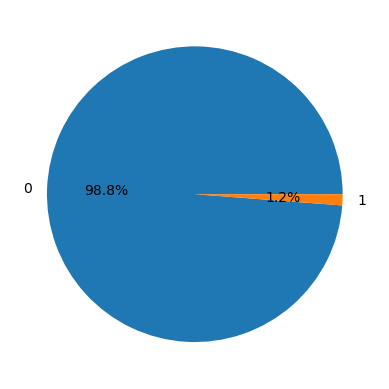

In [53]:
#Exploring the target column
import matplotlib.pyplot as plt
classes = data['fraud'].value_counts()
plt.pie(classes.values,
        labels = classes.index,
        autopct='%1.1f%%')
plt.show()

From the above plot, it is clear that the class distribution is highly uneqaul. To solve this, we will perform an oversampling technique called SMOTE (Synthetic Minority Over-sampling Technique). SMOTE will create new data points from minority class using the neighbour instances so generated samples are not exact copies but they are similar to instances we have. This we will do during the training plase.

### Converting Categorical columns to numeric using binary encoding

In [72]:
from category_encoders import BinaryEncoder 

cat_cols = [col for col in data.columns if data[col].dtype=='object']

encoder = BinaryEncoder(cols =cat_cols) 

# transforming the column after fitting
newdata = encoder.fit_transform(data[cat_cols])

# concatenating dataframe
data_new = pd.concat([data, newdata], axis = 1) 

# dropping old column 
data_new = data_new.drop(cat_cols, axis = 1)

data_new.head(10)



,step,amount,fraud,customer_0,customer_1,customer_2,customer_3,customer_4,customer_5,customer_6,...,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,zipMerchant_0,category_0,category_1,category_2,category_3
0,0,4.55,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,0,39.68,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,0,26.89,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,17.25,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,35.72,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
5,0,25.81,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
6,0,9.10,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
7,0,21.17,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
8,0,32.40,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
9,0,35.40,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [74]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step           594643 non-null  int64  
 1   amount         594643 non-null  float64
 2   fraud          594643 non-null  int64  
 3   customer_0     594643 non-null  int64  
 4   customer_1     594643 non-null  int64  
 5   customer_2     594643 non-null  int64  
 6   customer_3     594643 non-null  int64  
 7   customer_4     594643 non-null  int64  
 8   customer_5     594643 non-null  int64  
 9   customer_6     594643 non-null  int64  
 10  customer_7     594643 non-null  int64  
 11  customer_8     594643 non-null  int64  
 12  customer_9     594643 non-null  int64  
 13  customer_10    594643 non-null  int64  
 14  customer_11    594643 non-null  int64  
 15  customer_12    594643 non-null  int64  
 16  age_0          594643 non-null  int64  
 17  age_1          594643 non-nul

## Training

In [77]:
data_new.describe()

,step,amount,fraud,customer_0,customer_1,customer_2,customer_3,customer_4,customer_5,customer_6,...,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,zipMerchant_0,category_0,category_1,category_2,category_3
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,...,594643.000000,594643.000000,594643.000000,594643.000000,594643.00000,594643.0,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108,0.001473,0.442107,0.468276,0.480456,0.489554,0.495526,0.498714,...,0.029843,0.061630,0.111879,0.601943,0.40976,1.0,0.060100,0.068678,0.066539,0.896452
std,51.053632,111.402831,0.109369,0.038353,0.496638,0.498993,0.499618,0.499891,0.499980,0.499999,...,0.170154,0.240483,0.315218,0.489498,0.49179,0.0,0.237672,0.252906,0.249222,0.304673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,1.000000
50%,97.000000,26.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,1.0,0.000000,0.000000,0.000000,1.000000
75%,139.000000,42.540000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,1.0,0.000000,0.000000,0.000000,1.000000
max,179.000000,8329.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.000000


We need to scale the data.

In [82]:
#Spiltting the dataset into training and test sets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=data_new.copy()
y=X.pop('fraud')

#Train_test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [90]:
#SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 5036
Before OverSampling, counts of label '0': 411214 



C:\Users\Anisha\AppData\Local\Temp\ipykernel_11528\2872759163.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.ravel())
C:\Users\Anisha\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After OverSampling, the shape of train_X: (822428, 34)
After OverSampling, the shape of train_y: (822428,) 

After OverSampling, counts of label '1': 411214
After OverSampling, counts of label '0': 411214


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176229
           1       0.81      0.83      0.82      2164

    accuracy                           1.00    178393
   macro avg       0.91      0.91      0.91    178393
weighted avg       1.00      1.00      1.00    178393



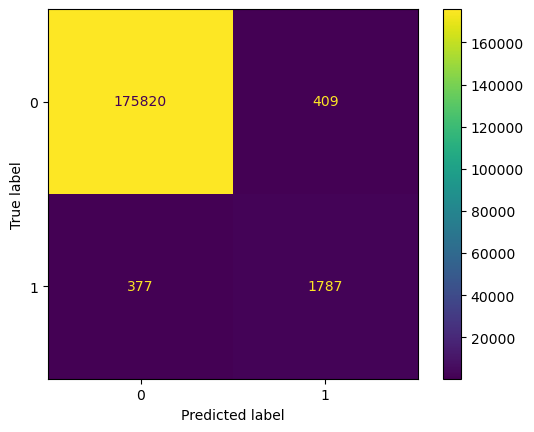

In [104]:
#The performance seems to be good. Lets verify
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.show()

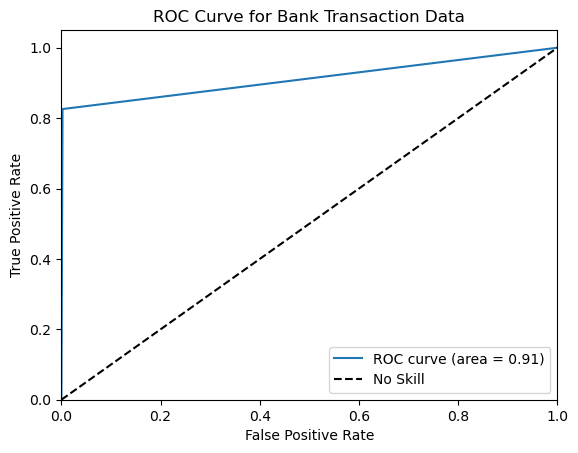

In [108]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bank Transaction Data')
plt.legend()
plt.show()

The ROC Curve is an analytical tool used in classification tasks that plots the true positive rate and false positive rate. It is also considered to be the best diagnostic test method as it shows the best cut-off value for diagnostic performance.

The dashed line represents the ROC Curve for the classifier. The AUC as 0.91, signifies good classification, meaning the model can distinguish fraudulent transactions pretty well.

How Ideal Curve looks like?
An ideal ROC curve would be as close as possible to the upper left corner of the plot, indicating high TPR (correctly identifying true positives) with low FPR (incorrectly identifying false positives). The closer the curve is to the diagonal baseline, the worse the classifier's performance.

The AUC score provides a quantitative measure of the classifier's performance, with a value of 1 indicating perfect classification and a value of 0.5 indicating no better than random guessostic performance.